# AD CLICK PREDICTION USING LOGISTIC REGRESSION AND XG-BOOST

This project is based on hypothetical case for a start-up which wants to predict the probability of a costumer clicking on a facebook ad, and then use this information for the purpouse of a future marketing targeted campaign.
The machine learning used in this project is a supervised machine learning technique named, logistic regression and then we will compare it to xg-boost


The features we are going to study are the following:
- Name
- e-mail
- Country
- Time on facebook
- Estimated salary (derived from other parameters)
- Target Variable : Click (1, costumer clicked on ad, and 0 did not click on ad)

Note: This is a synthetic dataset

###### Author: Roberto Daniel Totolici

__Load Packages anbd Dataset__

In [448]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
df_clicks = pd.read_csv('clicks_dataset.csv', encoding='ISO-8859-1')

In [450]:
df_clicks.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [451]:
df_clicks['Salary'].describe().round()

count       499.0
mean      52897.0
std       18989.0
min          20.0
25%       38888.0
50%       52841.0
75%       65837.0
max      100000.0
Name: Salary, dtype: float64

## EXPLORATORY DATA ANALYSIS

In [452]:

print("Clicked on Ad = ",len(df_clicks[df_clicks['Clicked']==1]))
print("Didn't Clicked on Ad = ",len(df_clicks[df_clicks['Clicked']==0]))
df_clicks.describe()

Clicked on Ad =  250
Didn't Clicked on Ad =  249


,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


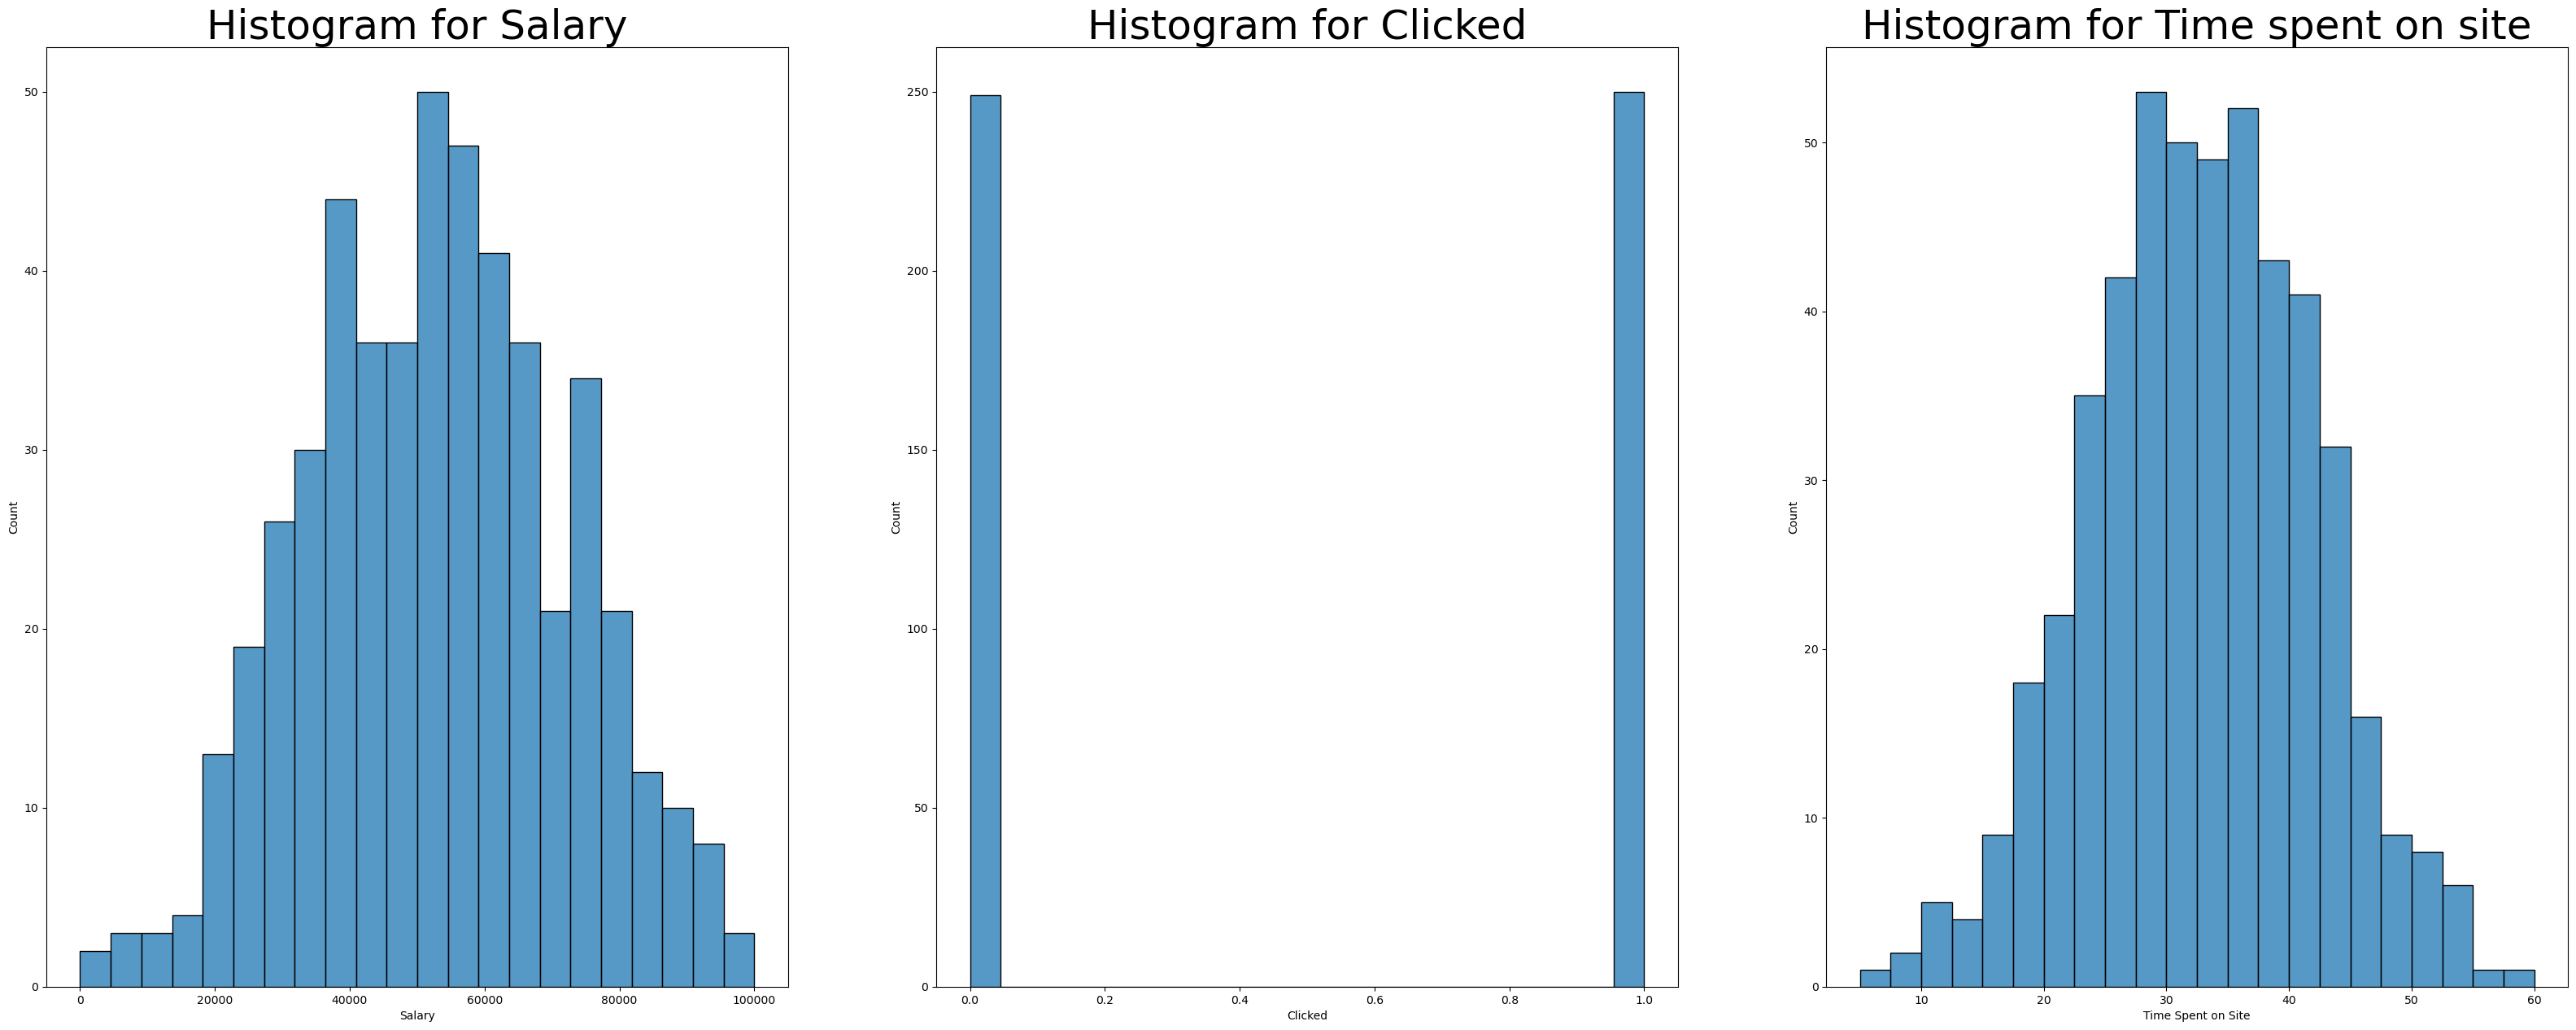

In [453]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 15))
sns.histplot(df_clicks['Salary'], kde=False, bins = int(np.sqrt(len(df_clicks))),ax=axes[0])
axes[0].set_title('Histogram for Salary', fontsize=36)

sns.histplot(df_clicks['Clicked'], kde=False, bins = int(np.sqrt(len(df_clicks))),ax=axes[1])
axes[1].set_title('Histogram for Clicked', fontsize=36)

sns.histplot(df_clicks['Time Spent on Site'], kde=False, bins = int(np.sqrt(len(df_clicks))),ax=axes[2])
axes[2].set_title('Histogram for Time spent on site', fontsize=36)

plt.show()

__Visualization__

Salary information given by Clicked Status

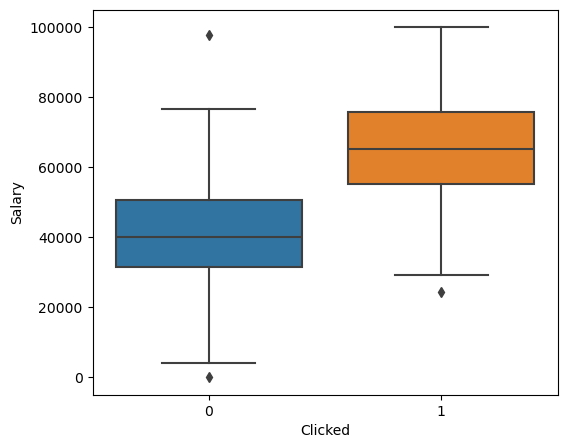

In [454]:
plt.figure(figsize=(6,5))
sns.boxplot(x = df_clicks['Clicked'], y = df_clicks['Salary'])
plt.show()

Salary information given by Salary and time spent on site,  highlighting the clicked state

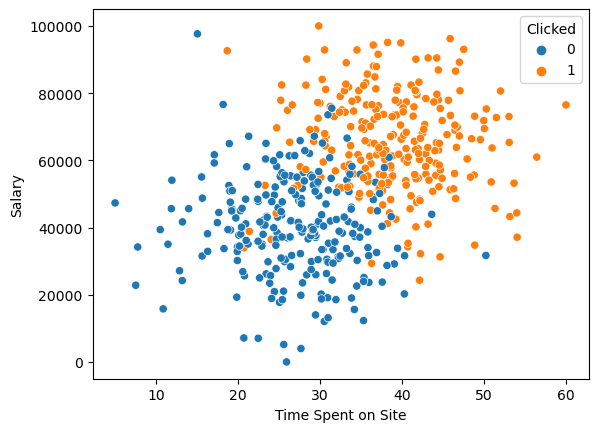

In [455]:
sns.scatterplot(x = df_clicks['Time Spent on Site'],
               y = df_clicks['Salary'],
               hue = df_clicks['Clicked'])
plt.show()

Does Time spent on the site has any correlation with a higher salary?
Or does time spent in site have a correlation with clicked ads?
Let's Find out

<Axes: >

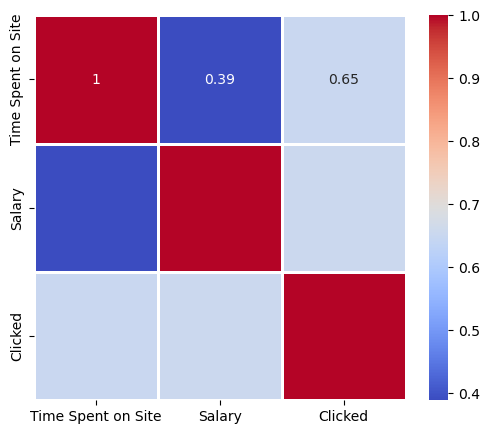

In [456]:
numeric_data_vector = df_clicks.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data_vector.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8)

In [457]:
correlation_matrix

,Time Spent on Site,Salary,Clicked
Time Spent on Site,1.000000,0.388330,0.650781
Salary,0.388330,1.000000,0.654654
Clicked,0.650781,0.654654,1.000000


Time Spent on site and Clicked on ad is more correlated than Salary and clicked on ad

## PREPARE DATA FOR TRAINING 


In [458]:
df_clicks.drop(['Names','emails','Country'],axis = 1, inplace = True)

In [459]:
df_clicks.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [460]:
#Separate data labels (clicked) ,from numeric inputs
X = df_clicks.drop('Clicked',axis =1)
Y = df_clicks['Clicked'].values

#let's take a look at this vectors
print(X[:])
print(Y[1:20])

     Time Spent on Site       Salary
0             25.649648  55330.06006
1             32.456107  79049.07674
2             20.945978  41098.60826
3             54.039325  37143.35536
4             34.249729  37355.11276
..                  ...          ...
494           19.222746  44969.13495
495           22.665662  41686.20425
496           35.320239  23989.80864
497           26.539170  31708.57054
498           32.386148  74331.35442

[499 rows x 2 columns]
[1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0]


In [461]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print("Scaled numeric features \n",X[1:5])

Scaled numeric features 
 [[-0.05102869  1.37859159]
 [-1.31666684 -0.62194482]
 [ 2.3222327  -0.83044362]
 [ 0.14619557 -0.81928096]]


### LOGISTIC REGRESSION MODEL FIT

In [462]:
#Data split , train set ,test_set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(399, 2) (399,) (100, 2) (100,)


In [463]:
#Perform Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)



LogisticRegression()

### TEST MODEL (TRAIN SET)

In [464]:
Y_predict = model.predict(X_train)

### CONFUSION MATRIX FOR TRAIN SET

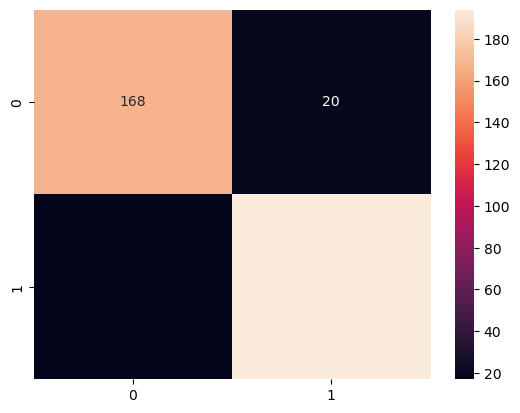

In [465]:
from sklearn.metrics import classification_report, confusion_matrix
conf = confusion_matrix(Y_train,Y_predict)
sns.heatmap(conf, annot = True, fmt = 'd')
plt.show()

### METRICS

In [466]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       188
           1       0.91      0.92      0.91       211

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



### VISUALIZATION THE RESULT OF LOGISTIC REGRESSION MODEL ON TRAIN AND TEST DATA SET

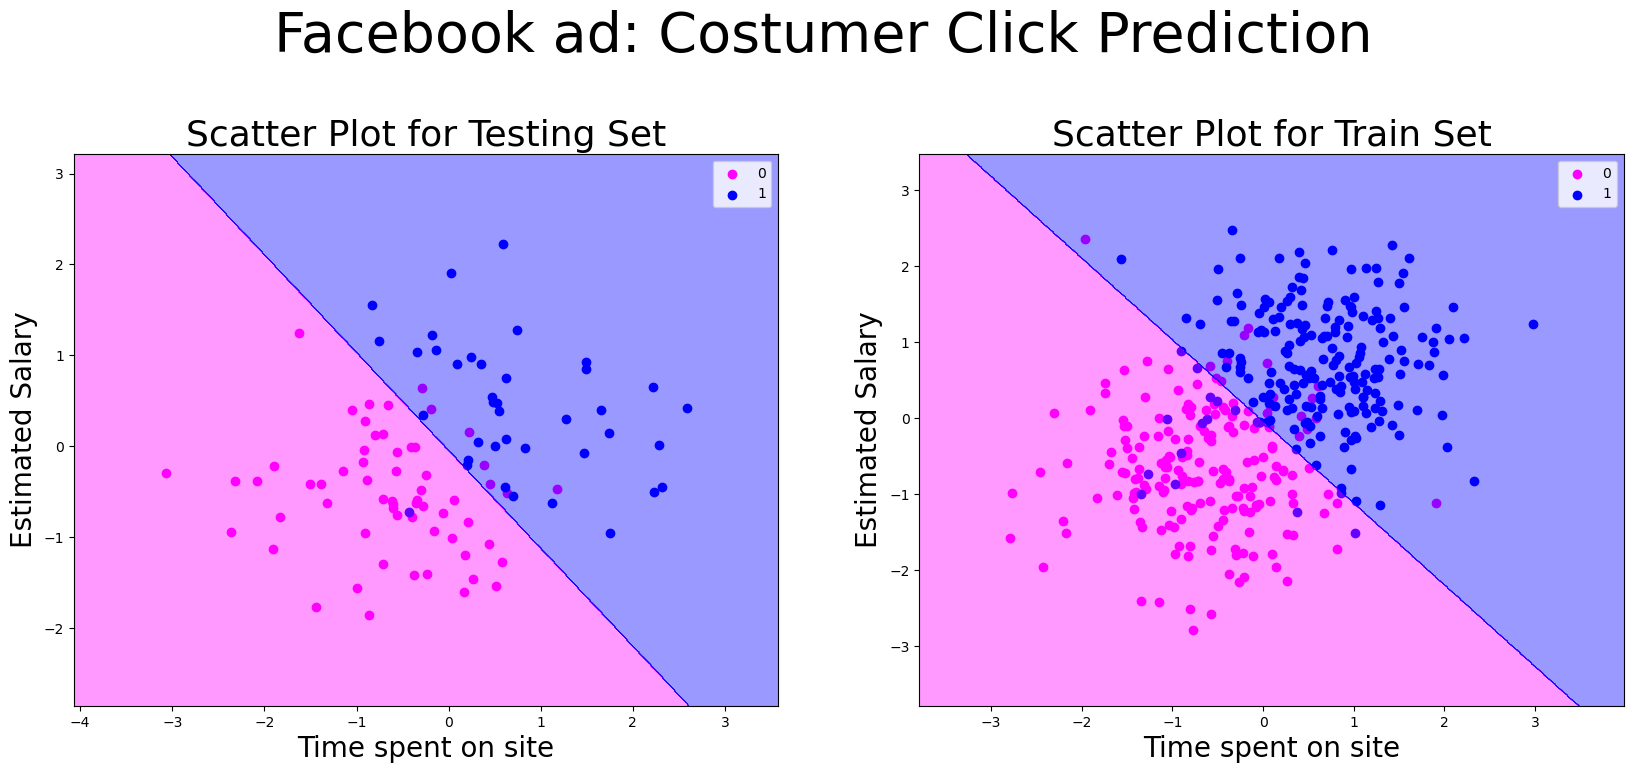

In [474]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

c = ['magenta', 'blue']
for i, j in enumerate(np.unique(Y_test)):
    axes[0].scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1], c=c[j], label=str(j))
    axes[1].scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], c=c[j], label=str(j))

X1_test, X2_test = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))

axes[0].contourf(X1_test, X2_test, model.predict(np.array([X1_test.ravel(), X2_test.ravel()]).T).reshape(X1_test.shape),
             alpha = 0.4, cmap = ListedColormap(c))

X1_train, X2_train = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))

axes[1].contourf(X1_train, X2_train, model.predict(np.array([X1_train.ravel(), X2_train.ravel()]).T).reshape(X1_train.shape),
             alpha = 0.4, cmap = ListedColormap(c))


fig.suptitle('Facebook ad: Costumer Click Prediction', fontsize = 40)
plt.subplots_adjust(top=0.8)

axes[0].set_title('Scatter Plot for Testing Set', fontsize=26)
axes[0].set_xlabel('Time spent on site', fontsize=20)
axes[0].set_ylabel('Estimated Salary', fontsize=20)
axes[0].legend()

axes[1].set_title('Scatter Plot for Train Set', fontsize=26)
axes[1].set_xlabel('Time spent on site', fontsize=20)
axes[1].set_ylabel('Estimated Salary', fontsize=20)
axes[1].legend()

plt.xlim(X1_test.min(), X1_test.max())
plt.ylim(X2_test.min(), X2_test.max())
plt.xlim(X1_train.min(), X1_train.max())
plt.ylim(X2_train.min(), X2_train.max())
plt.show()

### XG-BOOST MODEL 

In [468]:
# Fitting XG-Boost to the Training set
from sklearn.ensemble import GradientBoostingClassifier
model_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)


In [469]:
Y_predict_XG = model_xg.predict(X_train)

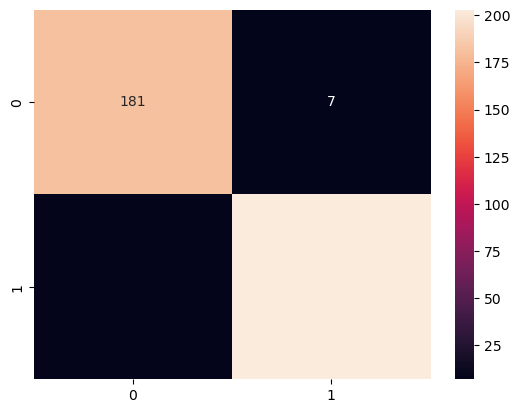

In [470]:
conf_XG = confusion_matrix(Y_train,Y_predict_XG)
sns.heatmap(conf_XG, annot = True, fmt = 'd')
plt.show()

In [471]:
print(classification_report(Y_train, Y_predict_XG))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       188
           1       0.97      0.96      0.96       211

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



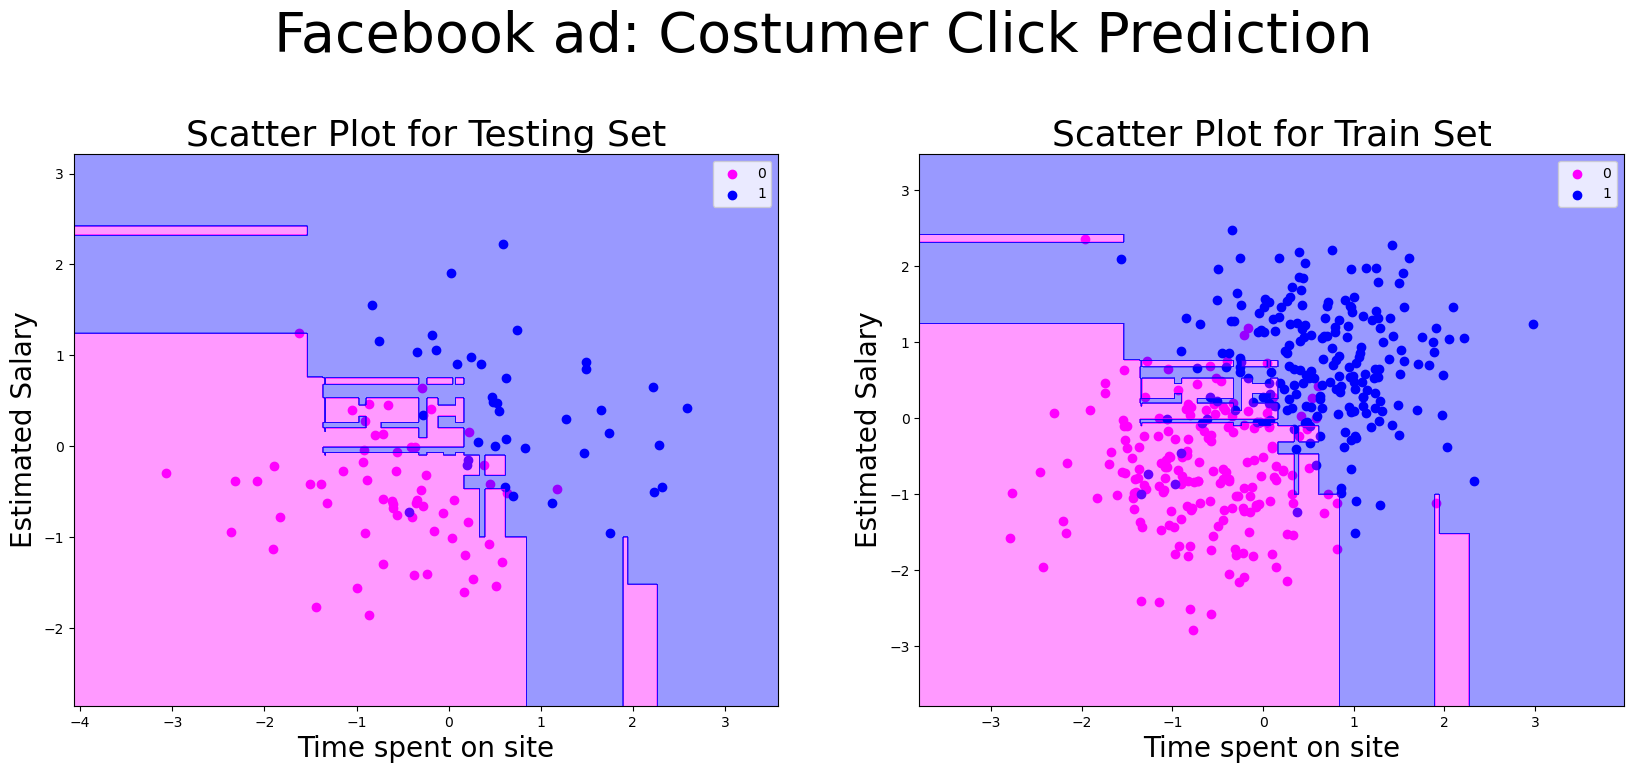

In [473]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

c = ['magenta', 'blue']
for i, j in enumerate(np.unique(Y_test)):
    axes[0].scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1], c=c[j], label=str(j))
    axes[1].scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], c=c[j], label=str(j))

X1_test_xg, X2_test_xg = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))

axes[0].contourf(X1_test_xg, X2_test_xg, model_xg.predict(np.array([X1_test_xg.ravel(), X2_test_xg.ravel()]).T).reshape(X1_test_xg.shape),
             alpha = 0.4, cmap = ListedColormap(c))

X1_train_xg, X2_train_xg = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))

axes[1].contourf(X1_train_xg, X2_train_xg, model_xg.predict(np.array([X1_train_xg.ravel(), X2_train_xg.ravel()]).T).reshape(X1_train_xg.shape),
             alpha = 0.4, cmap = ListedColormap(c))


fig.suptitle('Facebook ad: Costumer Click Prediction', fontsize = 40)
plt.subplots_adjust(top=0.8)

axes[0].set_title('Scatter Plot for Testing Set', fontsize=26)
axes[0].set_xlabel('Time spent on site', fontsize=20)
axes[0].set_ylabel('Estimated Salary', fontsize=20)
axes[0].legend()

axes[1].set_title('Scatter Plot for Train Set', fontsize=26)
axes[1].set_xlabel('Time spent on site', fontsize=20)
axes[1].set_ylabel('Estimated Salary', fontsize=20)
axes[1].legend()

plt.xlim(X1_test_xg.min(), X1_test_xg.max())
plt.ylim(X2_test_xg.min(), X2_test_xg.max())
plt.xlim(X1_train_xg.min(), X1_train_xg.max())
plt.ylim(X2_train_xg.min(), X2_train_xg.max())
plt.show()

# CONCLUSION

After we trained our models , one logistic regression and the other the xg-boost, we can conclude by the evaluated metrics that XG-BOOST model is better in terms of accuracy with a 96% accuracy vs 91% accuracy of the logistic regression

After we evaluated our models , now we can predict the probability of a costumer clicking an ad based on the time spent on the site and the Salary. Providing two differentiate groups, where we can use for future development of targeted marketing campaigns.